# **DS-PY-009 MACHINE LEARNING I**

---

<br>

## **Alunos:**
- João Victor Alexandrino
- Paulo Rêgo

## **Orientação:**
- Thiago Kuma
- Arthur Chaves

<br>

---

<br>

> `🗃️`<br>
> ### **Adult income dataset**<br>
Conjunto de dados que reúne features intuitivamente associadas à renda anual de um indivíduo, retiradas de censo estadunidense. Mais informações sobre o dataset e a reunião dos dados podem ser encontradas [aqui](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).<br><br>
O download foi realizado no [Kaggle](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset).

<br>

---

<br>

> `✅`
> ### **Checklist de demonstráveis**<br>
1. Nota sobre dados faltantes
2. Nota sobre o balanceamento do dataset
3. Uso de técnicas de conversão
4. Uso de Feature Scaling
5. Uso de métrica de avaliação
6. Uso de técnica para determinação de *k*
7. Uso de Pipeline
8. Uso da Otimização de Hiperparâmetros
9. Nota de explicação sobre a Otimização
10. Resultados dos modelos -- comparação

<br>

---

<br>

## **0. Importações iniciais**

In [ ]:
# Importação de pacotes básicos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Leitura dos dados

dados = pd.read_csv('/content/adult.csv')

## **1. Análise exploratória e primeiras manipulações**

In [ ]:
# Observando as primeiras linhas do dataset para avaliar a importação

dados.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**`✅ 1. Nota sobre dados faltantes`**

> `🔬`<br>
> Podemos observar que os dados faltantes do dataset estão preenchidos com `?`. Tal ocorrência vai requerer uma etapa extra de tratamento antes da geração do modelo.



In [ ]:
# Observando algumas informações preliminares sobre o dataset -- .info()

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Observando algumas informações preliminares sobre o dataset -- .describe()

dados.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


> `🔬`<br>
> Podemos observar que idealmente deveremos padronizar os dados numéricos, pois há grandes variações nas dimensões das variaveis medidas.

In [ ]:
# Observando algumas informações preliminares sobre o dataset -- filtrando dtype: object

dados.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


**`✅ 2. Nota sobre o balanceamento do dataset`**

> `🔬`<br>
> É importante constatar que, de acordo com as observações a seguir, o target se apresenta na forma de variável categórica que pode assumir dois valores. Após a conversão em variável numérica, um deles, na forma de `0` ou `<=50k`, é muito mais presente -- esse é um comportamento típico de amostras aleatórias de renda.

<br>



In [ ]:
# Observando a distribuição da variável alvo

dados.income.unique()

array(['<=50K', '>50K'], dtype=object)

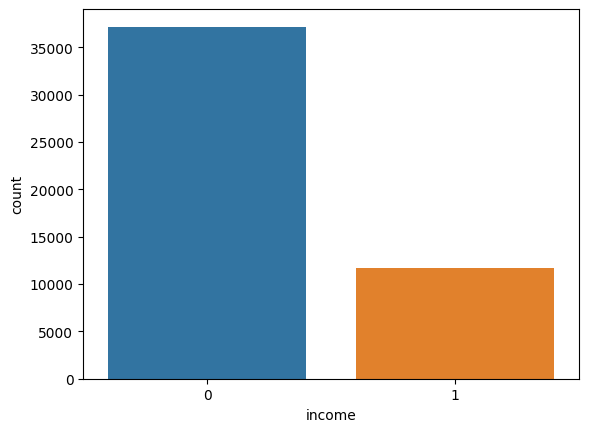

In [ ]:
# Realizando o encoding das variáveis

dados.income= dados.income.replace(['<=50K','>50K'],[0,1])

sns.countplot(x=dados["income"]);

In [ ]:
# Observando a distribuição da variável alvo

dados["income"].value_counts(normalize=True)

0    0.760718
1    0.239282
Name: income, dtype: float64

> `⚠️`<br>
`Nota: datasets desbalanceados *podem* gerar problemas no treinamento de modelos. Existem técnicas para lidar com esse problema como over e under-sampling, resampling com proporções diferentes etc. Apesar disso, foi considerado que o desbalanceamento deste caso não era muito grave e esse problema não foi tratado`

> `📊`<br>
> Para fortalecer um pouco mais a familiaridade com o dataset, a sumarização dos dados através de um `pairplot` do Seaborn pode condensar as relações entre os dados em uma figura. 

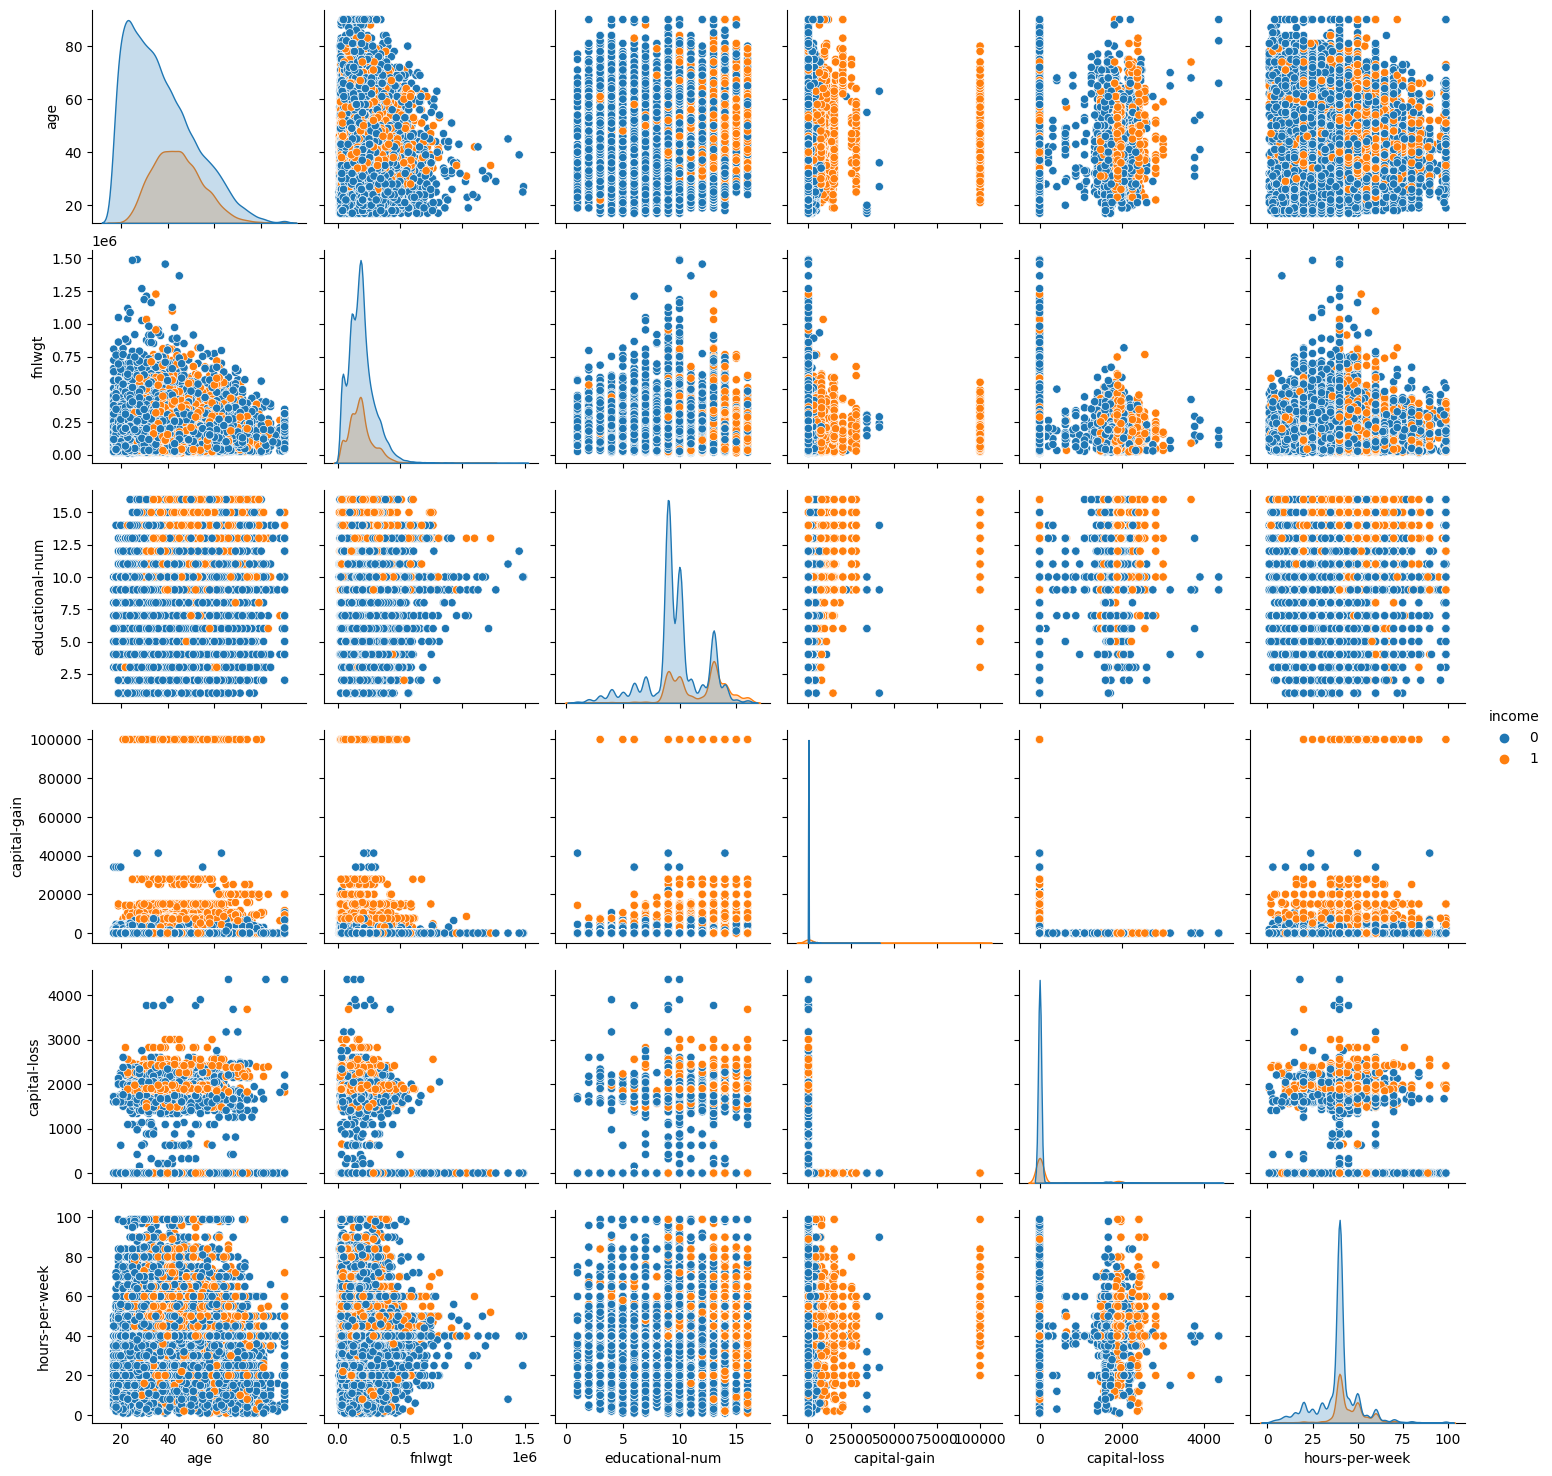

In [ ]:
# Visualizando a distribuição da variável alvo com relação às outras variáveis

sns.pairplot(dados, hue='income');

> `📊`<br>
> Um `heatmap` ajuda a visualizar a correlação entre as variáveis. É possível perceber que existe correlação entre o target, `income`, e as demais variáveis, com valores que não parecem levantar preocupações.
<br><br>
A variável fnlwgt chama atenção pela sua baixa correlação com os as outras variáveis, inclusive com a variável alvo. Essa variável atribui um peso para cada linha e é comum em pesquisas tipo censo para facilitar agrupamentos e médias. Para nossa modelagem, podemos remover ela.
<br><br>
Além disso, podemos perceber que as features têm baixa correlação entre si e aparentemente apresentam alguma correlação com a variável alvo. Dessa forma, nosso modelo pode ter boas chances de explicar/estimar o `income`


<Axes: >

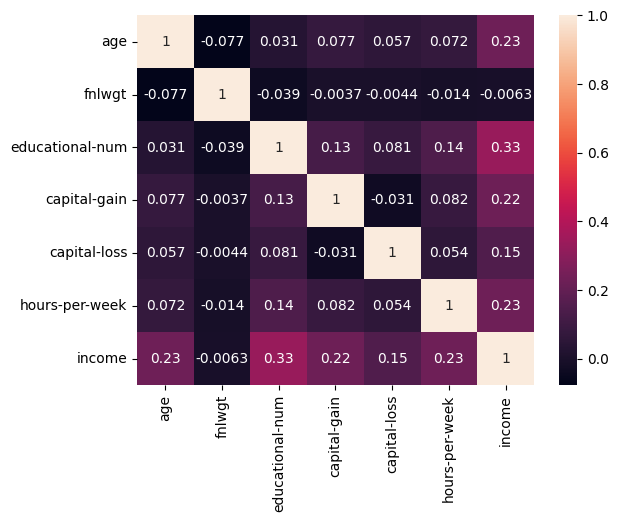

In [ ]:
# Visualizando a correlação das variáveis

sns.heatmap(dados.corr(),annot=True)

> `🛠️`<br>
> As próximas etapas compreendem a substuição de caracteres `?` por NaNs, para representar dados faltantes e facilitar o processo de remoção das observações incompletas. A recontagem dos valores de `0` e `1` ajuda a entender como o *drop* afeta o dataset como um todo.

**`✅ 1. Nota sobre dados faltantes [substituição]`**

In [ ]:
# Substituindo os dados faltantes que estavam marcados com ?

dados.replace('?',np.nan, inplace=True)

In [ ]:
dados.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [ ]:
# Removendo as linhas com informações faltantes

dados = dados.dropna(axis=0)

In [ ]:
# Verificando se a proporção entre as categorias na variável alvo foi muito alterada

dados["income"].value_counts(normalize=True)

0    0.752156
1    0.247844
Name: income, dtype: float64

**`✅ 3. Uso de técnicas de conversão`**

> `🛠️`<br>
> Para converter as variáveis categóricas em variáveis de natureza numérica, a função `pd.get_dummies()` é utilizada para codificar as features previamente identificas em etapa anterior:
<br>
* `workclass`
* `education`
* `marital-status`
* `occupation`
* `relationship`
* `race`
* `gender`
* `native-country`<br>
> 
> O parâmetro `drop_first=True` remove o primeiro nível de cada conjunto de dummies criado, para desfavorecer a ocorrência da [Dummy Variable Trap](https://www.learndatasci.com/glossary/dummy-variable-trap/) -- quando duas ou mais variáveis dummy criadas acabam apresentando alta correlação (multicolinearidade).

<br>

> `⚠️`<br>
`Nota: Cabe situar que a conversão das variáveis categóricas aumenta consideravelmente o número de features no dataset utilizado!`


In [ ]:
# Gerando dummies para as variáveis categóricas

dados_dummies = pd.get_dummies(dados, columns=["workclass", "education",
                                               "marital-status", "occupation",	
                                               "relationship", "race",	
                                               "gender", "native-country"],
                                               drop_first=True)

## **2. Problema**

> `🔬`<br>
> A definição do tipo de modelo começa a partir da definição do problema que precisa ser resolvido:<br><br>
`Dado um conjunto de dados que caracterizam um perfil socioeconômico, em qual dos grupos a renda anual do sujeito tende a estar -- no que reune os que ganham mais ou no dos que ganham menos de (ou até) 50.000,00 USD?`<br><br>
A partir de uma análise crítica, a manipulação de dados rotulados e um target discreto sugere um problema de **classificação**, abordado com métodos de aprendizagem supervisionada.<br>

> `🛠️`<br>
> Para a resolução desse problema, optou-se pela adoção de dois modelos diferentes:<br><br>
* O [K Nearest Neighbors, ou KNN](https://www.youtube.com/watch?v=HVXime0nQeI), é um modelo de classificação simples que agrupa dados com base no cálculo de distâncias. O modelo funciona calculando as distâncias (podem ser utilizadas várias medidas de distância) de cada observação e utilizando essa medida para agregar cada observação numa categoria.
* A [Árvore de Decisão](https://www.youtube.com/watch?v=_L39rN6gz7Y) é um modelo versátil que tenta gerar uma árvore de decisão a partir do dataset, elegendo variáveis e pesos para seus nós de modo que seja maximizada uma medida de "organização da informação" ou minimizada a entropia (desorganização). 

## **3. Treino, teste e transformação**

> `🛠️`<br>
> A primeira parte do processo é constituída pela criação de dois DataFrames: `X` representa as observações, sem identificadores (incluindo o target); e `y` é a coleção de targets. <br><br>
Em seguida, são definidos os sets de treino e teste. Como parâmetros, adotou-se `0.2` como a proporção do dataset a ser incluída no set de treino e uma estratificação que respeita a proporção dos valores do target (y).

In [ ]:
# Separação do dataset em amostras de treino e teste

from sklearn.model_selection import train_test_split

# Separado a variável alvo
y = dados_dummies["income"]

# Removendo a variável alvo e a fnlwgt que não será importante para o modelo
X = dados_dummies.drop(columns = ["income", "fnlwgt"])

# Separando entre treino e teste
# Como a há um desbalanceamento na distribuição da variável alvo, é importante utilizar o stratify para que seja mantida essa proporção
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)


**`✅ 4. Uso de Feature Scaling`**

> `🛠️`<br>
> As diferentes ordens de grandeza presentes nos dados demandam uma transformação para escalas semelhantes. Abaixo, o `StandarScaler` é utilizado para padronizar os valores de treino e teste de `X` (separadamente!). 

In [ ]:
# Aplicando o StandartScaler nas variáveis numéricas
# Como recomendado, foi aplicado o scaler de maneira separada nos datasets de treino e teste

from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
X_train_std = scaler_train.fit_transform(X_train)

scaler_test = StandardScaler()
X_test_std = scaler_test.fit_transform(X_test)

## **4. KNN**

> `🛠️`<br>
> As próximas células compreendem a importação do da função de classificador KNN, sua atribuição a uma variável e o *fit*.

> `⚠️`<br>
> O numero ideal de `neighbors` definido como parâmetro é contextualizado mais à frente.

> `🤖`<br>
> Depois de treinado, o modelo é utilizado no conjunto de teste (padronizado) de `X` e uma avaliação dos resultados obtidos é feita através da comparação com o conjunto de teste das targets previamente separado.

In [ ]:
# Importando o modelo que será utilizado (KNN)

from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Treinando o modelo

modelo.fit(X_train_std, y_train)

KNeighborsClassifier()

In [ ]:
# Utilizando o modelo treinado para classificar o dataset de teste

y_pred = modelo.predict(X_test_std)

In [ ]:
y_pred_train = modelo.predict(X_train_std)

**`✅ 5. Uso de métrica de avaliação`**

> `📏`<br>
> A métrica adotada para a avaliação da performance do modelo será o `f1-score`.

In [ ]:
# Gerando um resumo de avaliação do modelo

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6803
           1       0.65      0.57      0.61      2242

    accuracy                           0.82      9045
   macro avg       0.76      0.73      0.75      9045
weighted avg       0.81      0.82      0.81      9045

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     27211
           1       0.78      0.68      0.73      8966

    accuracy                           0.87     36177
   macro avg       0.84      0.81      0.82     36177
weighted avg       0.87      0.87      0.87     36177



**`✅ 6. Uso de técnica para determinação de k`**

> `🛠️`<br>
> Para fazer um protótipo de otimização do hiperparâmetro `k`, é possível rodar o modelo iterativamente variando o valor de `k`, guardando os resultados de f1-score. 

In [ ]:
from sklearn.metrics import f1_score

# Inicializa a variável que vai acumular os resultados de f1
f1_test = []
f1_train = []

# Rodando um laço treinando e avaliando o modelo com K variando de 1 a 30
for i in range(1,31,2):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_std,y_train)
 pred_test = knn.predict(X_test_std)
 pred_train = knn.predict(X_train_std)
 f1_test.append(f1_score(pred_test, y_test))
 f1_train.append(f1_score(pred_train, y_train))

> `📊`<br>
> Um gráfico pode ser plotado para entender visualmente como essa métrica se comporta.<br>

O score F1 máximo foi: 0.6154960173787111 para um valor de K = 5


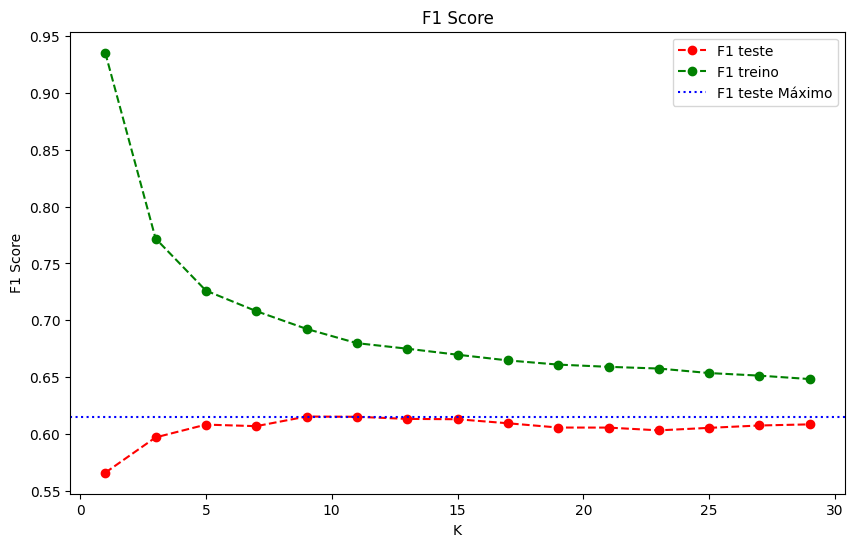

In [ ]:
# Visualizando f1-score acordo com o número de k escolhido
## Assim podemos escolher um k que maximize o F1

plt.figure(figsize=(10,6))
plt.plot(range(1,31,2),f1_test,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=6, label = "F1 teste")
plt.plot(range(1,31,2),f1_train,color='green', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=6, label = "F1 treino")
plt.axhline(y = max(f1_test), color = 'b', linestyle = ':', label = "F1 teste Máximo")
plt.title('F1 Score')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.legend()
print("O score F1 máximo foi:",max(f1_test),"para um valor de K =",f1_test.index(max(f1_test))+1)

> `🔬`
> Constata-se que o valor máximo do f1-score é obtido para `k=5`, dessa forma, esse foi o valor de `k` adotado para treinar o modelo.

## **5. Árvore de Decisão, Pipeline e Otimização de Hiperparâmetros**

**`✅ 7. Uso de Pipeline`**<br>
**`✅ 8. Uso da Otimização de Hiperparâmetros`**<br>
**`✅ 9. Nota de explicação sobre a Otimização`**<br>

> `🛠️`<br>
> Agora que um modelo simples foi aplicado, é possível incorporar mais técnicas e um modelo mais complexo para efeitos de comparação e avaliação de performance. Para tanto, será utilizada a técnica de gerar um pipeline para aplicar a padronização e treinar um modelo de Árvore de Decisão. O pipeline de operações estruturado será utilizado em conjunto com uma busca aleatória para otimizar alguns hiperparâmetros do modelo e avaliar o resultado final.

> `🔬`<br>
> Os hiperparâmetros a serem avaliados são:
* `criterion`: define como o grau de desorganização das informações vai ser calculado
* `max_features`: o número máximo de features que serão utilizadas para o modelo
* `max_depth`: a profundidade máxima das árvores geradas pelo modelo
* `class_weight`: se todas as classes da variável alvo terão o mesmo peso ou se serão balanceadas

> `⚠️`<br>
> `Nota: A sugestão de valores para exploração em *max_features* precisa levar em consideração que, após a conversão dos valores categóricos, o número de colunas passou a ser *96*.`

In [ ]:
# Construindo o pipeline com o Decision Tree Classifier e otimizando os hiperparâmetros

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV


# Criando o pipeline de operações que serão executadas no dataset
pipe  = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Definindo o grid de hiperparâmetros que serão avaliados
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_features': [20, 30, 40, 50, 60, 70],
    'model__max_depth': [None, 4, 8, 10, 12, 14, 16],
    'model__class_weight': [None, 'balanced']
}


# Gerando o agrupamento de modelos com conjuntos aleatórios de hiperparâmetros de acordo com o grid definido
## Além do pipe, do grid de parâmetros e da seed, o random search recebe ainda os seguintes parâmetros:
### cv : número de 'folds' realizados na crosvalidation
### n_iter: número de iterações de fit de modelo
### n_jobs: número de jobs criados no processo (usado para paralelização)
random_search = RandomizedSearchCV(pipe, param_grid, random_state=42, n_iter=40, cv=5 ,n_jobs=-1)


> `🔍`<br>
> Após gerar o grid de parâmetros, podemos utilizador a busca aleatória para otimizar os hiperparâmetros.

In [ ]:
# Buscando os melhores hiperparâmetros

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'model__class_weight': [None,
                                                                'balanced'],
                                        'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [None, 4, 8, 10, 12,
                                                             14, 16],
                                        'model__max_features': [20, 30, 40, 50,
                                                                60, 70]},
                   random_state=42)

In [ ]:
# Gerando a nova previsão 

y_pred = random_search.predict(X_test)

In [ ]:
# Visualizando a performance do modelo otimizado

print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6803
           1       0.76      0.59      0.66      2242

    accuracy                           0.85      9045
   macro avg       0.82      0.76      0.78      9045
weighted avg       0.85      0.85      0.85      9045

0.6646661665416355


In [ ]:
# Visualizando os melhores hiperparâmetros encontrados na busca

random_search.best_params_

{'model__max_features': 70, 'model__max_depth': 12, 'model__criterion': 'gini', 'model__class_weight': None}
0.8541062559428918


**`✅ 10. Resultados dos modelos -- comparação`**

> `💭`<br>
> Assim, é possível observar que mesmo utilizando técnicas mais complexas, o resultado foi relativamente parecido. Dado que boa parte da baixa performance é explicada pelo baixo f1-score nas observações de alta renda, uma hipótese é que seria possível obter um melhor resultado fazendo oversampling dessas observações, eliminando assim o desbalanceamento da variável alvo.